In [216]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


## Importing Data Sets

In [181]:
# Training data sets
train_beneficiarydata = pd.read_csv("./healthCareData/train_beneficiarydata.csv")
train_inpatientdata = pd.read_csv("./healthCareData/train_inpatientdata.csv")
train_outpatientdata = pd.read_csv("./healthCareData/train_outpatientdata.csv")
train_potentialfraud = pd.read_csv("./healthCareData/train_potentialfraud.csv")

#Testing data sets
test_beneficiarydata = pd.read_csv("./healthCareData/test_beneficiarydata.csv")
test_inpatientdata = pd.read_csv("./healthCareData/test_inpatientdata.csv")
test_outpatientdata = pd.read_csv("./healthCareData/test_outpatientdata.csv")
test_potentialfraud = pd.read_csv("./healthCareData/test_potentialfraud.csv")


In [182]:
pd.options.display.max_columns = None


In [183]:
train_inpatientdata.sample(2)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
17746,BENE76185,CLM79154,2009-12-10,2009-12-22,PRV51146,12000,PHY348010,PHY336688,NaN,2009-12-10,78701,1068.0,2009-12-22,342,56081,0413,7852,99813,V4582,55321,27651,27800,2638,E9352,5459.0,NaN,NaN,NaN,NaN,NaN
7784,BENE39472,CLM63519,2009-08-12,2009-08-13,PRV51434,7000,PHY376863,PHY359021,NaN,2009-08-12,515,1068.0,2009-08-13,167,51181,2720,7231,E8783,NaN,NaN,NaN,NaN,NaN,NaN,3420.0,NaN,NaN,NaN,NaN,NaN


In [184]:
train_outpatientdata.sample(2)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
71509,BENE31377,CLM240555,2009-03-11,2009-03-11,PRV51492,40,PHY399260,NaN,NaN,V6751,V5883,59970,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100,NaN
221581,BENE74655,CLM431204,2009-06-23,2009-06-23,PRV57125,60,PHY413538,NaN,PHY313659,4011,V5869,75310,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


## Warmup Question 1:

- How many medical doctors are there in the train outpatient dataset?
- How many medical doctors are there in the train inpatient dataset? Do they match with those from the outpatient record?
- Do those inpatient patients show worse health conditions (in terms of chronic diseases) than typical outpatient patients, or do those who have more visits to the providers have worse health conditions? Provide an analysis on these issues.
- How many distinct patients (BeneIDs) are there in the in/out-patient datasets?
- Do doctors serve for different providers? Study the distribution of hospital counts/doctor? Is it possible to characterize those doctors who move around among different providers?
- Do patients go to different hospitals? Study the distribution of hospital counts/patient? It is possible to characterize those patients who receive services from a lot of different hospitals?
- Do the same providers provide both inpatient and outpatient services? Summarize your finding.
- Do Some of the same patients receive both inpatient and outpatient services? Summarize your finding.

In [418]:
#How many medical doctors are there in the train outpatient dataset?
train_outpatientdata.AttendingPhysician.unique().shape  # there are 74,110 attending physicians

#How many medical doctors are there in the train inpatient dataset? Do they match with those from the outpatient record?
train_inpatientdata.AttendingPhysician.unique().shape  # there are 11,605 attending phsyicians. There are more providers on the outpatient data

(11605,)

In [8]:
#Create columns for inpatient and outpatient data.
train_inpatientdata['patientType'] = np.repeat('inpatient', len(train_inpatientdata))
train_outpatientdata['patientType'] = np.repeat('outpatient', len(train_outpatientdata))



In [9]:
#Combining the inpatient and outpatient data
patient = pd.concat([train_inpatientdata, train_outpatientdata], axis=0)
patient.BeneID.unique().shape

(138556,)

In [348]:
#Merge the patient data frame and 
full_data =pd.merge(patient, train_beneficiarydata, on='BeneID', how='left')

In [351]:
train_potentialfraud.PotentialFraud.value_counts()

No     4904
Yes     506
Name: PotentialFraud, dtype: int64

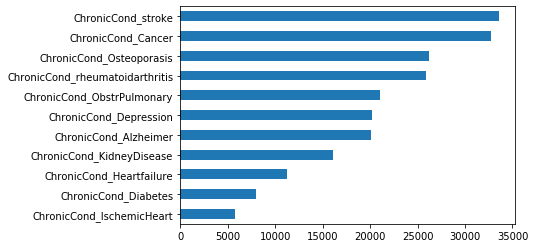

In [222]:
inpatient_chronic = full_data.loc[full_data.patientType=='inpatient'].filter(regex='Chronic')

inpatient_chronic[inpatient_chronic==2].count().sort_values().plot(kind='barh')

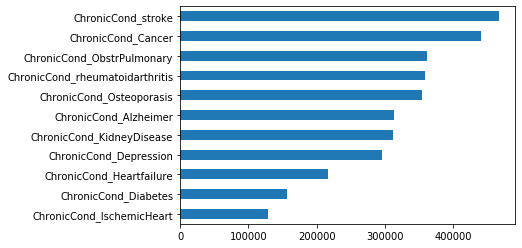

In [285]:
outpatient_chronic = full_data.loc[full_data.patientType=='outpatient'].filter(regex='Chronic')

outpatient_chronic[outpatient_chronic==2].count().sort_values().plot(kind='barh')

## Do those inpatient patients show worse health conditions (in terms of chronic diseases) than typical outpatient patients?

In [405]:
full_data.filter(regex='BeneID|Chronic').groupby('BeneID').mean().sum(axis=1)/11

BeneID
BENE100000    1.909091
BENE100001    1.636364
BENE100002    1.363636
BENE100003    1.909091
BENE100004    1.454545
                ...   
BENE99994     1.727273
BENE99995     1.272727
BENE99997     1.454545
BENE99998     1.818182
BENE99999     1.636364
Length: 138556, dtype: float64

Text(0.5, 0, 'type of patient')

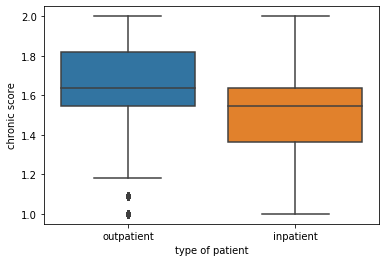

In [406]:
bene_chronic = full_data.filter(regex='Chronic|Bene|Type')
bene_chronic = pd.DataFrame(bene_chronic.groupby(['BeneID', 'patientType']).mean().sum(axis=1)/11).reset_index()
bene_chronic= bene_chronic.rename(columns={0:'chronic_risk'})

sns.boxplot(x='patientType', y='chronic_risk', data=bene_chronic)
plt.ylabel('chronic score')
plt.xlabel('type of patient')
                       

##  Do those who have more visits to the providers have worse health conditions? Provide an analysis on these issues.

In [407]:
bene_chronic2 = full_data.filter(regex='Chronic|Bene')
bene_chronic2 = pd.DataFrame(bene_chronic2.groupby(['BeneID']).mean().sum(axis=1)/11).reset_index()
bene_chronic2= bene_chronic2.rename(columns={0:'chronic_risk'})
bene_chronic2

,BeneID,chronic_risk
0,BENE100000,1.909091
1,BENE100001,1.636364
2,BENE100002,1.363636
3,BENE100003,1.909091
4,BENE100004,1.454545
...,...,...
138551,BENE99994,1.727273
138552,BENE99995,1.272727
138553,BENE99997,1.454545
138554,BENE99998,1.818182


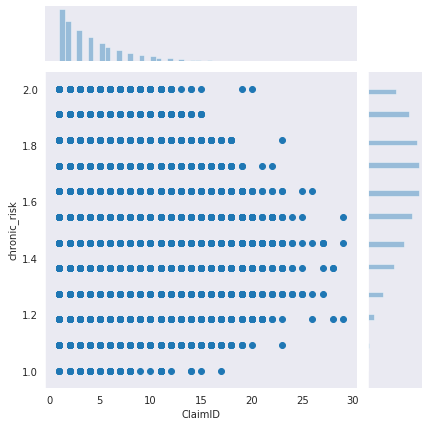

In [519]:
bene_claim = full_data.groupby('BeneID')['ClaimID'].size().reset_index()
bene_claim
bene_provider = pd.merge(bene_claim, bene_chronic2, on='BeneID', how='left')
bene_provider


with sns.axes_style("dark"):
    sns.jointplot(x=bene_provider.ClaimID, y=bene_provider.chronic_risk );


## How many distinct patients (BeneIDs) are there in the in/out-patient datasets?

In [415]:
#There are 31,289 distinct inpatient patients
full_data.loc[full_data.patientType=='inpatient'].BeneID.unique().shape

#Tehre are 133,980 distinct outpatient patients
full_data.loc[full_data.patientType=='outpatient'].BeneID.unique().shape

(133980,)

## Do doctors serve for different providers?
## Study the distribution of hospital counts/doctor?
## Is it possible to characterize those doctors who move around among different providers?

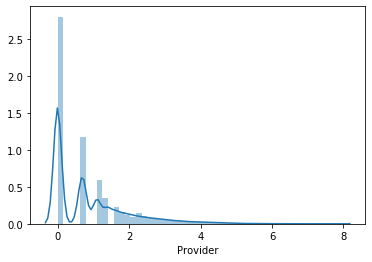

In [514]:
provider_doctor = full_data[['Provider', 'AttendingPhysician']].copy()

provider_doctor = provider_doctor.groupby('AttendingPhysician')['Provider'].count().reset_index()
provider_doctor.sort_values(by = 'Provider',ascending=False)

provider_doctor.Provider.unique()

sns.distplot(np.log(provider_doctor.Provider))



## Do patients go to different hospitals? Study the distribution of hospital counts/patient? It is possible to characterize those patients who receive services from a lot of different hospitals?

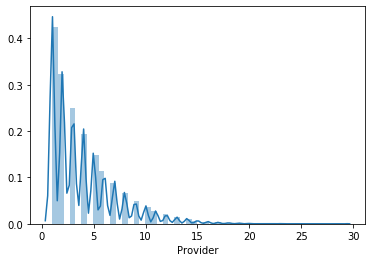

In [515]:
provider_patient = full_data[['Provider', 'BeneID']].copy()

provider_patient = provider_patient.groupby('BeneID')['Provider'].count().reset_index()
provider_patient.Provider.unique()

sns.distplot(provider_patient.Provider)

## Do the same providers provide both inpatient and outpatient services? Summarize your finding.

In [555]:
provider_inpatient = full_data[['Provider', 'patientType']].copy()
provider_inpatient= provider_inpatient.loc[provider_inpatient.patientType=='inpatient']
provider_inpatient

provider_outpatient = full_data[['Provider', 'patientType']].copy()
provider_outpatient= provider_outpatient.loc[provider_outpatient.patientType=='outpatient']
provider_outpatient

,Provider,patientType
40474,PRV56011,outpatient
40475,PRV57610,outpatient
40476,PRV57595,outpatient
40477,PRV56011,outpatient
40478,PRV56011,outpatient
...,...,...
558206,PRV53699,outpatient
558207,PRV53702,outpatient
558208,PRV53676,outpatient
558209,PRV53689,outpatient


In [560]:
#There are 1694 providers that provide both inpatient and outpatient services
provider_services = pd.merge(provider_outpatient, provider_inpatient, on='Provider')
provider_services.Provider.unique().shape


(1694,)

## Do Some of the same patients receive both inpatient and outpatient services? Summarize your finding.

In [565]:
#There are 26,713 patients that received both inpatient and outpatient services

patient_inpatient = full_data[['BeneID', 'patientType']].copy()
patient_inpatient = patient_inpatient.loc[patient_inpatient.patientType=='inpatient']

patient_outpatient = full_data[['BeneID', 'patientType']].copy()
patient_outpatient = patient_outpatient.loc[patient_outpatient.patientType=='outpatient']

patient_services = pd.merge(patient_outpatient, patient_inpatient, on='BeneID')
patient_services.BeneID.unique().shape


(26713,)